# Introduction to `matplotlib`

The [`matplotlib`](http://matplotlib.org/) library is a powerful tool capable of producing complex publication-quality figures with fine layout control in two and three dimensions. In this Bootcamp section we'll cover `matplotlib` basics to get you up to speed before breaking out into exercises where you can sharpen your `matplotlib` skills by practicing.

### Importing `matplotlib`

Just as we used aliases for the `numpy` and `pandas` packages (i.e. `import numpy as np; import pandas as pd`), there's a typical shorthand for importing matplotlib. We'll be using the `pyplot` module, and importing it like so:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

The `%matplotlib inline` magic function will render plots as output within your iPython notebook cells. 

## `plot` 

In [ ]:
x = [5, 6, 7, 8]
y = [10, 8, 9, 7]

plt.plot(x, y);    # If no `x` values given, assumes x=range(len(y))

### Title, Labels

The most frequently used function is simply called plot, here is how you can make a simple plot of $\sin(x)$ and $\sin(x^2)$ for $x \in [0, 2\pi]$ with labels and a grid (we use the semicolon in the last line to suppress the display of some information that is unnecessary right now):

In [ ]:
x = np.linspace(0, 2*np.pi, 300)
y = np.sin(x)
y2 = np.sin(x**2)

plt.figure()
plt.plot(x, y, label=r'$\sin(x)$')    # Strings enclosed in $'s rendered w/ LaTeX
plt.plot(x, y2, label=r'$\sin(x^2)$')
plt.title('Some functions')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend();

### Controlling lines and markers

You can control the style, color and other properties of the markers, for example:

In [ ]:
x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)
plt.plot(x, y, linewidth=2);

In [ ]:
plt.plot(x, y, 'o', markersize=5, color='r');

## Other plot types

### Errorbars

We will now see how to create a few other common plot types, such as a simple error plot:

In [ ]:
# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# example variable error bar values
yerr = 0.1 + 0.2*np.sqrt(x)
xerr = 0.1 + yerr

plt.errorbar(x, y, xerr=0.2, yerr=0.4)
#plt.errorbar(x, y, xerr=xerr, yerr=yerr)
plt.title("Be certain about your uncertainties");

### Logarithmic axes

In [ ]:
x = np.linspace(-5, 5)
y = np.exp(-x**2)
plt.semilogy(x, y);

### Histogram

A histogram annotated with text inside the plot, using the text function:

In [ ]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='k', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
# This will put a text fragment at the position given:
plt.text(55, .027, r'$\mu=100,\ \sigma=15$', fontsize=14)
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

### Two-dimensional arrays

Remember to use the `?` command to find out which parameters each method takes.

In [ ]:
plt.imshow(np.random.rand(5,10), interpolation='nearest', cmap='Blues');

### Simple 3d plotting with matplotlib


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.YlGnBu,
        linewidth=0, antialiased=False)
ax.set_zlim3d(-1.01, 1.01);

## Outside the notebook

Interactive `matplotlib` figures allow you to dig into your data. The cell below will save a python script that makes a plot, and the cell below that will run that script from the command line, which will open an interactive plot for you to view and tinker with. 

See the docs page on [Interactive Navigation](http://matplotlib.org/users/navigation_toolbar.html) for instructions on how to explore the contents of the figure.

In [ ]:
%%writefile interact.py

import matplotlib.pyplot as plt
import numpy as np
n = 1000
x = np.arange(n)
y = 5*np.random.randn(n) + 75

score_axis_limits = (55, 95)

# Make a row of two axes
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Put a scatter plot in the first axes
ax[0].scatter(x, y)
ax[0].set(xlabel='Student ID', ylabel='Scores',
          ylim=score_axis_limits)

# Put a histogram of the same data in the second
n_bins = 20
ax[1].hist(y, n_bins, orientation='horizontal')
ax[1].set(xlabel='Scores', ylim=score_axis_limits)

fig.suptitle('Final Exam')

plt.show()


In [ ]:
%%bash
python interact.py

## Tip: Know the gallery!

The `matplotlib` [gallery](http://matplotlib.org/gallery.html) is full of example figures and their source code. Use them as recipes to get to your desired figure quickly.

***

# Exercises

### The Keeling Curve

**Background**: Climate data are ubiquitous in the news today, so let's reproduce one of climatology's most famous plots, the ["Keeling Curve"](https://en.wikipedia.org/wiki/Keeling_Curve), which shows steadily rising abundance of CO$_2$ in the Earth's atmosphere. From the [NOAA Earth System Research Laboratory](http://www.esrl.noaa.gov/gmd/ccgg/trends/):

> The carbon dioxide data (red curve), measured as the mole fraction in dry air, on Mauna Loa constitute the longest record of direct measurements of CO2 in the atmosphere. They were started by C. David Keeling of the Scripps Institution of Oceanography in March of 1958 at a facility of the National Oceanic and Atmospheric Administration [Keeling, 1976]... The black curve represents the seasonally corrected data. 

**Your task**: The carbon dioxide data are stored in `/data/CO2.txt` (you won't reproduce the black line). The first column is the decimal year, the second column is the atmospheric CO$_2$ in parts per million. You can load the data using `numpy.loadtxt`. Try to reproduce the figure using `matplotlib`!

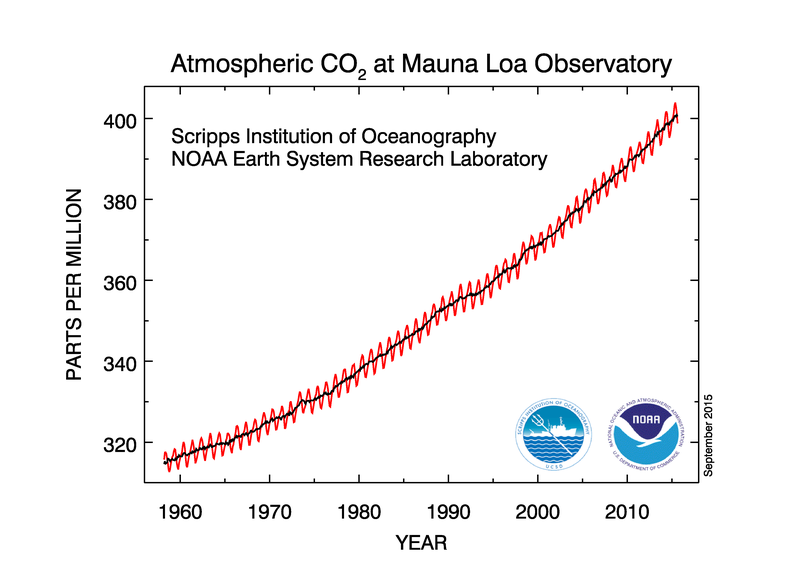

In [1]:
from IPython.display import Image
Image('data/co2_data.png')

### The spectrum of the early Universe

**Background**: One of the most famous plots in astronomy is a spectrum of the cosmic microwave background - radiation emitted in the early Universe - first produced by the [COBE/FIRAS](http://lambda.gsfc.nasa.gov/product/cobe/about_firas.cfm) instrument. It's been said that when this plot was first shown at a conference, there was a standing ovation for its contents, which showed exquisite agreement between theory and observations, triumphantly validating the science of cosmology ([source](http://lambda.gsfc.nasa.gov/product/cobe/firas_monopole_get.cfm)). 

**Your task**: The data are stored in `data/firas_spectrum.txt` in three columns: wavelength (`x`), measured intensity (`y`) uncertainty ($1\sigma$), and model intensity. You can load these data with `numpy.loadtxt`. Try to reproduce this plot worthy of a standing ovation!

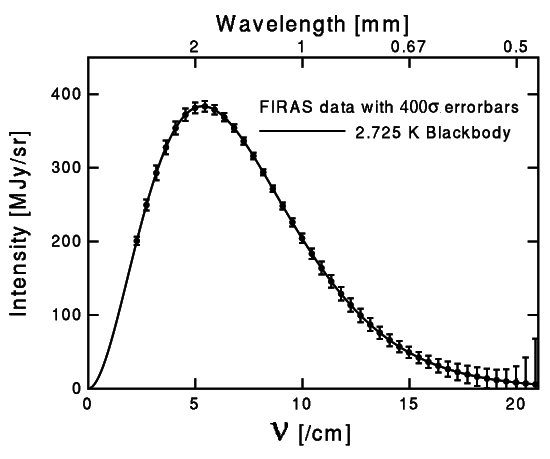

In [2]:
from IPython.display import Image
Image('data/firas_spectrum.png')

### The Discovery of DNA

**Background**: [Photo 51](https://en.wikipedia.org/wiki/Photo_51) is the x-ray diffraction image of the DNA molecule taken by [Rosalind Franklin](https://en.wikipedia.org/wiki/Rosalind_Franklin)'s lab at King's College London which led to the discovery of the helical structure of DNA. 

**Your task**: Use `matplotlib`'s `imshow` to come up with your best rendition of Photo 51 (below). Experiment with rendering the image using the various [colormaps](http://matplotlib.org/examples/color/colormaps_reference.html) available in `matplotlib`. An array of pixel intensities is stored in `/data/photo51.txt`, which can be loaded easily with `numpy.loadtxt`.

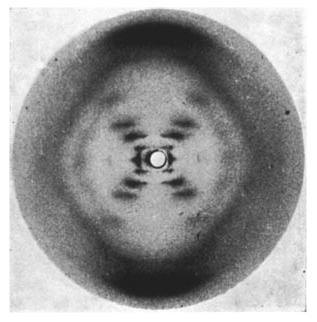

In [3]:
from IPython.display import Image
Image('data/photo51.jpg')


### Advanced: FiveThirtyEight

**Background**: [FiveThirtyEight](http://fivethirtyeight.com/) is a blog on popular statistics, covering a range of topics from politics to economics to sports. They curate complex models of football teams' "power", which can be compared to other analyses. In the following plot, we'll see the FiveThirtyEight's "ELO" ranking plotted against ESPN's "FPI" ranking, as a means of comparing the two models. 

**Your task**: Use `matplotlib` 's [style sheet feature](http://matplotlib.org/examples/style_sheets/plot_fivethirtyeight.html) to replicate the FiveThirtyEight-style plot from [this article](http://fivethirtyeight.com/datalab/ratings-nerd-fight-seattle-is-1-in-elo-green-bay-is-1-in-fpi/) (shown below). The data required to make this plot are stored in the `data/538.csv` file, which you can read using `pandas.read_csv`. The red line is actually a fit to the data, but you can plot an `x=y` line in the range 1350-1650 instead as a shortcut (since it's close and we're not testing your regression skills here).

Don't agonize over getting every detail of your replica correct unless you're having fun. Bonus points if you can label the teams!

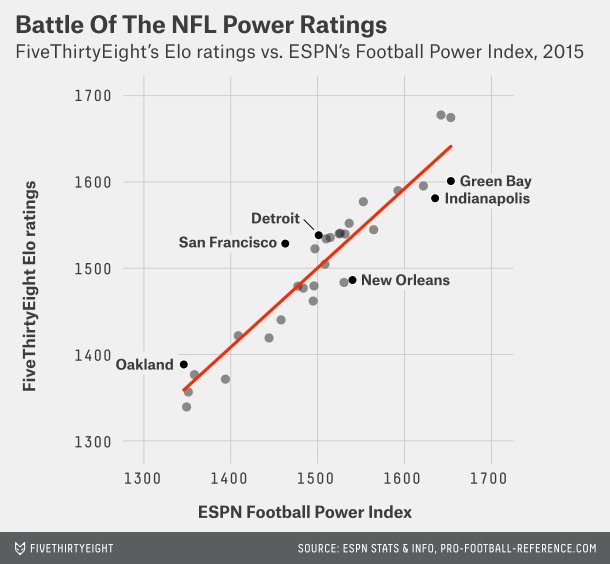

In [4]:
from IPython.display import Image
Image('data/538.png')